In [56]:
import string
import re
from numpy import array, argmax, random, take, argmax, ndarray
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
from neuralplot import ModelPlot
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [2]:
import re
import pandas as pd
from numpy import array

# function to read raw text file
def read_text(filename):
        # open the file
        file = open(filename, mode='rt', encoding='utf-8')
        
        # read all text
        text = file.read()
        file.close()
        return text
# Let’s define another function to split the text into English-German pairs separated by ‘\n’. We’ll then split these pairs into English sentences and German sentences respectively.
# split a text into sentences

def to_lines(text):
      sents = text.strip().split('\n')
      sents = [i.split('\t') for i in sents]
      return sents

#We can now use these functions to read the text into an array in our desired format.

data = read_text("deu.txt")
deu_eng = to_lines(data)
#deu_eng = array(deu_eng)

print(data[0:175])

Go.	Geh.	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)
Hi.	Hallo!	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)


In [3]:
data = read_text("deu.txt")
deu_eng = to_lines(data)
deu_eng = array(deu_eng)

In [4]:
deu_eng = deu_eng[:50000,:]

In [5]:
deu_eng

array([['Go.', 'Geh.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi.', 'Hallo!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi.', 'Grüß Gott!',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['She watched him swim.', 'Sie hat ihm beim Schwimmen zugesehen.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #887579 (CK) & #1354024 (Esperantostern)'],
       ['She went on a picnic.', 'Sie ist zu einem Picknick gegangen.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #312052 (CK) & #1475963 (Zaghawa)'],
       ['She went on speaking.', 'Sie sprach weiter.',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #317518 (CK) & #814982 (Manfredo)']],
      dtype='<U537')

In [6]:
# Remove punctuation
deu_eng[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:,0]]
deu_eng[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in deu_eng[:,1]]

deu_eng

array([['Go', 'Geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['Hi', 'Hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['Hi', 'Grüß Gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['She watched him swim', 'Sie hat ihm beim Schwimmen zugesehen',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #887579 (CK) & #1354024 (Esperantostern)'],
       ['She went on a picnic', 'Sie ist zu einem Picknick gegangen',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #312052 (CK) & #1475963 (Zaghawa)'],
       ['She went on speaking', 'Sie sprach weiter',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #317518 (CK) & #814982 (Manfredo)']],
      dtype='<U537')

In [7]:
# convert text to lowercase
for i in range(len(deu_eng)):
    deu_eng[i,0] = deu_eng[i,0].lower()
    deu_eng[i,1] = deu_eng[i,1].lower()

deu_eng

array([['go', 'geh',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)'],
       ['hi', 'hallo',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #380701 (cburgmer)'],
       ['hi', 'grüß gott',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #659813 (Esperantostern)'],
       ...,
       ['she watched him swim', 'sie hat ihm beim schwimmen zugesehen',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #887579 (CK) & #1354024 (Esperantostern)'],
       ['she went on a picnic', 'sie ist zu einem picknick gegangen',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #312052 (CK) & #1475963 (Zaghawa)'],
       ['she went on speaking', 'sie sprach weiter',
        'CC-BY 2.0 (France) Attribution: tatoeba.org #317518 (CK) & #814982 (Manfredo)']],
      dtype='<U537')

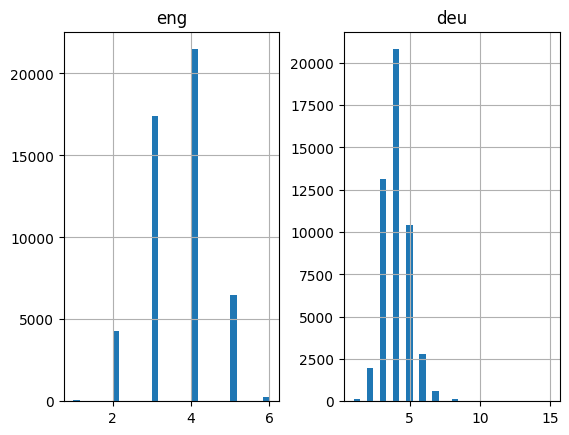

In [8]:
# empty lists
eng_l = []
deu_l = []

# populate the lists with sentence lengths
for i in deu_eng[:,0]:
      eng_l.append(len(i.split()))

for i in deu_eng[:,1]:
      deu_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'deu':deu_l})

length_df.hist(bins = 30)
plt.show()

In [9]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer
# prepare english tokenizer
eng_tokenizer = tokenization(deu_eng[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 6096


In [10]:
# prepare Deutch tokenizer
deu_tokenizer = tokenization(deu_eng[:, 1])
deu_vocab_size = len(deu_tokenizer.word_index) + 1

deu_length = 8
print('Deutch Vocabulary Size: %d' % deu_vocab_size)

Deutch Vocabulary Size: 10038


In [11]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
         # integer encode sequences
         seq = tokenizer.texts_to_sequences(lines)
         # pad sequences with 0 values
         seq = pad_sequences(seq, maxlen=length, padding='post')
         return seq

In [12]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(deu_eng, test_size=0.2, random_state = 12)

In [13]:
# prepare training data
trainX = encode_sequences(deu_tokenizer, deu_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(deu_tokenizer, deu_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])

In [14]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
      model = Sequential()
      model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
      model.add(LSTM(units))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(units, return_sequences=True))
      model.add(Dense(out_vocab, activation='softmax'))
      return model

In [15]:
# model compilation
model = define_model(deu_vocab_size, eng_vocab_size, deu_length, eng_length, 512)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 512)            5139456   
                                                                 
 lstm (LSTM)                 (None, 512)               2099200   
                                                                 
 repeat_vector (RepeatVector  (None, 8, 512)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 8, 512)            2099200   
                                                                 
 dense (Dense)               (None, 8, 6096)           3127248   
                                                                 
Total params: 12,465,104
Trainable params: 12,465,104
Non-trainable params: 0
____________________________________________

In [16]:
filename = 'model.h1.4_Apr_2023'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)


Epoch 1/30
62/63 [============================>.] - ETA: 0s - loss: 3.3253
Epoch 1: val_loss improved from inf to 2.73658, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 26s 312ms/step - loss: 3.3205 - val_loss: 2.7366
Epoch 2/30
62/63 [============================>.] - ETA: 0s - loss: 2.6891
Epoch 2: val_loss improved from 2.73658 to 2.70434, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 286ms/step - loss: 2.6885 - val_loss: 2.7043
Epoch 3/30
62/63 [============================>.] - ETA: 0s - loss: 2.5369
Epoch 3: val_loss improved from 2.70434 to 2.49944, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 281ms/step - loss: 2.5365 - val_loss: 2.4994
Epoch 4/30
62/63 [============================>.] - ETA: 0s - loss: 2.3542
Epoch 4: val_loss improved from 2.49944 to 2.37364, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 294ms/step - loss: 2.3534 - val_loss: 2.3736
Epoch 5/30
62/63 [============================>.] - ETA: 0s - loss: 2.2121
Epoch 5: val_loss improved from 2.37364 to 2.24882, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 19s 303ms/step - loss: 2.2113 - val_loss: 2.2488
Epoch 6/30
62/63 [============================>.] - ETA: 0s - loss: 2.0828
Epoch 6: val_loss improved from 2.24882 to 2.12560, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 293ms/step - loss: 2.0821 - val_loss: 2.1256
Epoch 7/30
62/63 [============================>.] - ETA: 0s - loss: 1.9533
Epoch 7: val_loss improved from 2.12560 to 2.03632, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 285ms/step - loss: 1.9525 - val_loss: 2.0363
Epoch 8/30
62/63 [============================>.] - ETA: 0s - loss: 1.8302
Epoch 8: val_loss improved from 2.03632 to 1.96127, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 293ms/step - loss: 1.8298 - val_loss: 1.9613
Epoch 9/30
62/63 [============================>.] - ETA: 0s - loss: 1.7152
Epoch 9: val_loss improved from 1.96127 to 1.90215, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 282ms/step - loss: 1.7155 - val_loss: 1.9021
Epoch 10/30
62/63 [============================>.] - ETA: 0s - loss: 1.6107
Epoch 10: val_loss improved from 1.90215 to 1.78241, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 293ms/step - loss: 1.6104 - val_loss: 1.7824
Epoch 11/30
62/63 [============================>.] - ETA: 0s - loss: 1.5108
Epoch 11: val_loss improved from 1.78241 to 1.72253, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 288ms/step - loss: 1.5105 - val_loss: 1.7225
Epoch 12/30
62/63 [============================>.] - ETA: 0s - loss: 1.4162
Epoch 12: val_loss improved from 1.72253 to 1.66852, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 297ms/step - loss: 1.4164 - val_loss: 1.6685
Epoch 13/30
62/63 [============================>.] - ETA: 0s - loss: 1.3281
Epoch 13: val_loss improved from 1.66852 to 1.63320, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 286ms/step - loss: 1.3281 - val_loss: 1.6332
Epoch 14/30
62/63 [============================>.] - ETA: 0s - loss: 1.2442
Epoch 14: val_loss improved from 1.63320 to 1.56554, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 295ms/step - loss: 1.2445 - val_loss: 1.5655
Epoch 15/30
62/63 [============================>.] - ETA: 0s - loss: 1.1629
Epoch 15: val_loss improved from 1.56554 to 1.53936, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 282ms/step - loss: 1.1627 - val_loss: 1.5394
Epoch 16/30
62/63 [============================>.] - ETA: 0s - loss: 1.0875
Epoch 16: val_loss improved from 1.53936 to 1.48891, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 17s 281ms/step - loss: 1.0878 - val_loss: 1.4889
Epoch 17/30
62/63 [============================>.] - ETA: 0s - loss: 1.0148
Epoch 17: val_loss improved from 1.48891 to 1.44983, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 282ms/step - loss: 1.0151 - val_loss: 1.4498
Epoch 18/30
62/63 [============================>.] - ETA: 0s - loss: 0.9455
Epoch 18: val_loss improved from 1.44983 to 1.41106, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 17s 280ms/step - loss: 0.9452 - val_loss: 1.4111
Epoch 19/30
62/63 [============================>.] - ETA: 0s - loss: 0.8798
Epoch 19: val_loss improved from 1.41106 to 1.38813, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 287ms/step - loss: 0.8804 - val_loss: 1.3881
Epoch 20/30
62/63 [============================>.] - ETA: 0s - loss: 0.8174
Epoch 20: val_loss improved from 1.38813 to 1.35072, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 17s 280ms/step - loss: 0.8174 - val_loss: 1.3507
Epoch 21/30
62/63 [============================>.] - ETA: 0s - loss: 0.7575
Epoch 21: val_loss improved from 1.35072 to 1.33988, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 285ms/step - loss: 0.7571 - val_loss: 1.3399
Epoch 22/30
62/63 [============================>.] - ETA: 0s - loss: 0.7025
Epoch 22: val_loss improved from 1.33988 to 1.32135, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 17s 276ms/step - loss: 0.7023 - val_loss: 1.3213
Epoch 23/30
62/63 [============================>.] - ETA: 0s - loss: 0.6493
Epoch 23: val_loss improved from 1.32135 to 1.30569, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 292ms/step - loss: 0.6497 - val_loss: 1.3057
Epoch 24/30
62/63 [============================>.] - ETA: 0s - loss: 0.5995
Epoch 24: val_loss improved from 1.30569 to 1.27757, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 284ms/step - loss: 0.5995 - val_loss: 1.2776
Epoch 25/30
62/63 [============================>.] - ETA: 0s - loss: 0.5526
Epoch 25: val_loss improved from 1.27757 to 1.26928, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 282ms/step - loss: 0.5532 - val_loss: 1.2693
Epoch 26/30
62/63 [============================>.] - ETA: 0s - loss: 0.5090
Epoch 26: val_loss did not improve from 1.26928
63/63 [==============================] - 4s 63ms/step - loss: 0.5095 - val_loss: 1.2696
Epoch 27/30
62/63 [============================>.] - ETA: 0s - loss: 0.4681
Epoch 27: val_loss improved from 1.26928 to 1.24705, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 17s 278ms/step - loss: 0.4684 - val_loss: 1.2470
Epoch 28/30
62/63 [============================>.] - ETA: 0s - loss: 0.4298
Epoch 28: val_loss improved from 1.24705 to 1.24203, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 289ms/step - loss: 0.4298 - val_loss: 1.2420
Epoch 29/30
62/63 [============================>.] - ETA: 0s - loss: 0.3947
Epoch 29: val_loss improved from 1.24203 to 1.23083, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 281ms/step - loss: 0.3947 - val_loss: 1.2308
Epoch 30/30
62/63 [============================>.] - ETA: 0s - loss: 0.3619
Epoch 30: val_loss improved from 1.23083 to 1.21870, saving model to model.h1.4_Apr_2023


63/63 [==============================] - 18s 284ms/step - loss: 0.3618 - val_loss: 1.2187


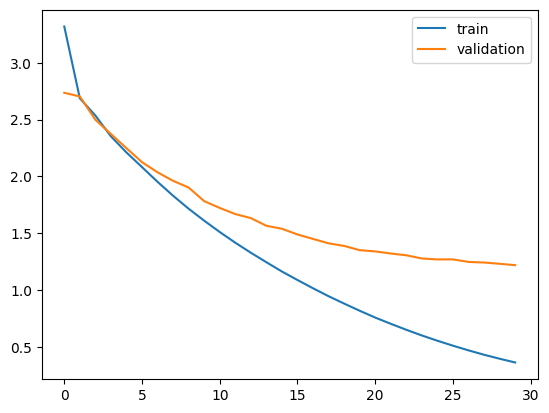

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [20]:
#model = load_model('model.h1.4_Apr_2023')
#preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

model = load_model('model.h1.4_Apr_2023')
preds = model.predict(testX) 
classes_x = argmax(preds, axis=1)

313/313 [==============================] - 3s 5ms/step


In [40]:
'''def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None'''

In [44]:
def get_word(n, tokenizer):
    if isinstance(n, ndarray):
        return [get_word(x, tokenizer) for x in n]
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [45]:
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(argmax(i[j]), eng_tokenizer)
        if j > 0:
            if (t == get_word(argmax(i[j-1]), eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t)
    preds_text.append(' '.join(temp))


In [49]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})

In [50]:
# print 15 rows randomly
pred_df.sample(15)

,actual,predicted
5435,tomll pay,tomll pay
9273,you may swim,you may swim
8160,we were eating eggs,we were eating eggs
6405,she works hard,she works hard
558,im leaving tomorrow,im leaving tomorrow
9411,i cant make it,i cant make it
2734,is this red wine,is this red wine
2495,are you students,are you students
2127,whod you invite,whod you invite
1597,tom wasnt promoted,tom wasnt promoted
